# Ensemble Methods

## Quick Motivation

In [257]:
from math import factorial, comb

In [258]:
def prob_right(p, n, k):
    return p**k*comb(n,k)*(1-p)**(n-k)

In [259]:
N = 9
accuracy= 0.60
majority = (N+1)//2
probs = [prob_right(accuracy, N,n) for n in range(N+1)]
P = np.cumsum(probs)
1-P[majority-1]

np.float64(0.7334323199999999)

## Voting 

In [260]:
import matplotlib.pyplot as plt

In [261]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np

In [262]:
from sklearn.datasets import make_moons

In [263]:
X,y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

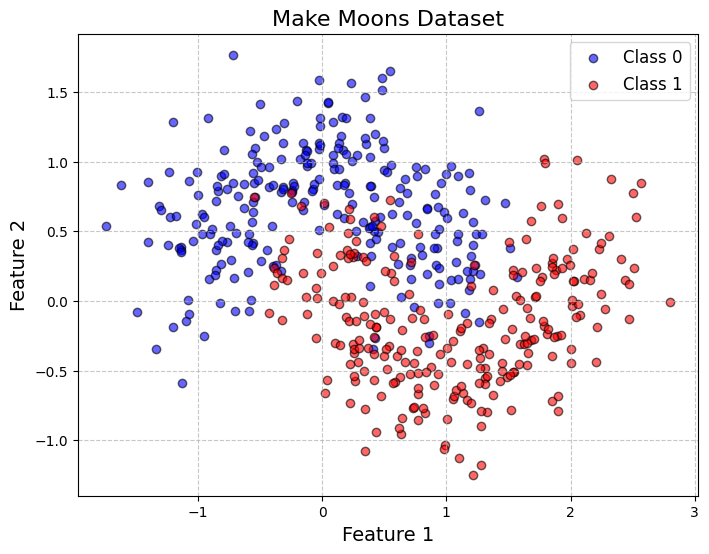

In [264]:

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x=X[y == 0, 0], y=X[y == 0, 1], color='blue', label='Class 0', alpha=0.6, edgecolor='k')
plt.scatter(x=X[y == 1, 0], y=X[y == 1, 1], color='red', label='Class 1', alpha=0.6, edgecolor='k')

# Enhance plot aesthetics
plt.title('Make Moons Dataset', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [265]:
voting_clf = VotingClassifier(
    estimators=[
        ('logistic regression', LogisticRegression(random_state = 420)),
        ('Decision Tree', DecisionTreeClassifier(random_state = 420)),
        ('KNN', KNeighborsClassifier(n_neighbors=5))])

In [266]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic regression',
                              LogisticRegression(random_state=420)),
                             ('Decision Tree',
                              DecisionTreeClassifier(random_state=420)),
                             ('KNN', KNeighborsClassifier())])

In [267]:
for name, clf in voting_clf.named_estimators_.items():
    print(f"{name} = {clf.score(X_test, y_test)}")

logistic regression = 0.864
Decision Tree = 0.88
KNN = 0.912


In [268]:
print(f"Voting score = {voting_clf.score(X_test, y_test)}")

Voting score = 0.928


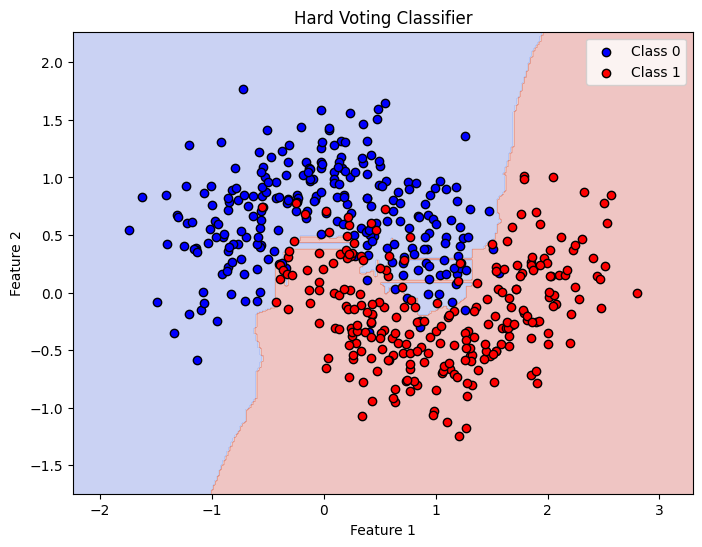

In [269]:
# Function to plot the decision boundary
def plot_decision_boundary(clf, X, y, ax=None, cmap='coolwarm', title="Decision Boundary"):
    if ax is None:
        ax = plt.gca()
    
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    # Predict on the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    ax.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0', edgecolor='k')
    ax.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1', edgecolor='k')
    ax.set_title(title)
    ax.legend()

# Plot the dataset and decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(voting_clf, X, y, title = "Hard Voting Classifier")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [270]:
soft_voting_clf = VotingClassifier(
    estimators=[
        ('logistic regression', LogisticRegression(random_state = 420)),
        ('Decision Tree', DecisionTreeClassifier(random_state = 420)),
        ('KNN', KNeighborsClassifier())],
    voting = 'soft')

In [271]:
soft_voting_clf.fit(X_train, y_train)
soft_voting_clf.score(X_test, y_test)

0.904

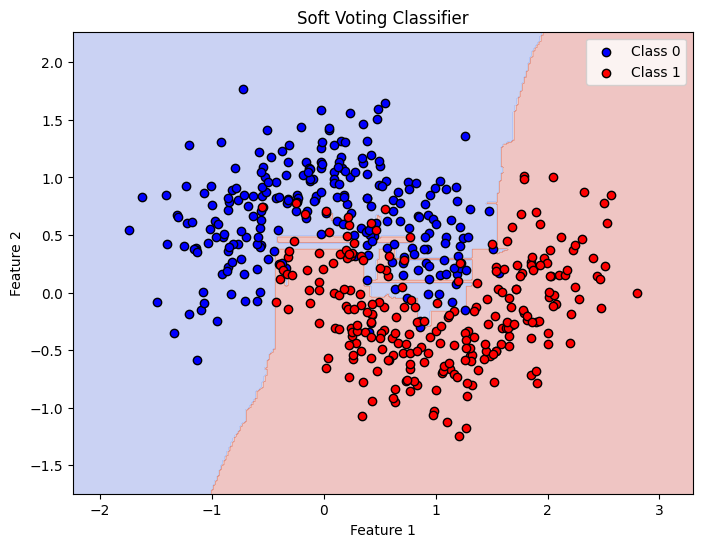

In [272]:
# Plot the dataset and decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(soft_voting_clf, X, y, title = "Soft Voting Classifier")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## To - Do

Implement a voting classifier for the 'iris' dataset. Code to load the dataset is provided. Report the accuracy of your model. Use cross-validation for higher confidence in your result! Your voter can combine whicher classifiers you want.

In [273]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Extract features (X) and target labels (y)
X = iris.data    # Feature matrix (shape: 150 x 4)
y = iris.target  # Target vector (shape: 150,)

# Optionally, access feature and target names
feature_names = iris.feature_names
target_names = iris.target_names

print("Feature names:", feature_names)
print("Target names:", target_names)
print("Data shape:", X.shape)
print("Target shape:", y.shape)


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)
Target shape: (150,)


In [274]:
## Your Code Here!

## Bagging

In [275]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

### Decision Tree

In [276]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
print("Accuracy of Decision Tree: ", tree_clf.score(X_test, y_test))

Accuracy of Decision Tree:  0.848


In [277]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100,
                            max_samples = 100, random_state=42)

In [278]:
bag_clf.fit(X_train, y_train)
print("Accuracy of Bagging 500 Trees: ", bag_clf.score(X_test, y_test))

Accuracy of Bagging 500 Trees:  0.92


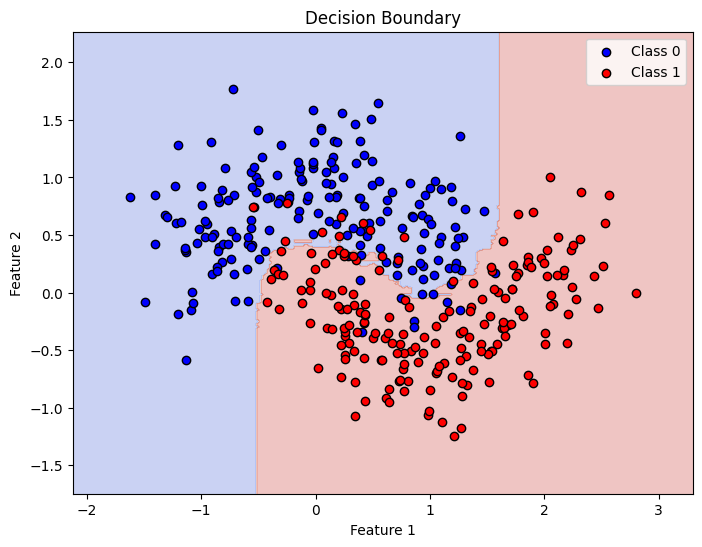

In [280]:
# Plot the dataset and decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(bag_clf, X_train, y_train)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Random Forests

In [281]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes = 16, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, random_state=42)

In [282]:
rnd_clf.fit(X_train, y_train)
print("Accuracy of Random Forest: ", bag_clf.score(X_test, y_test))

Accuracy of Random Forest:  0.92


### Feature Importance

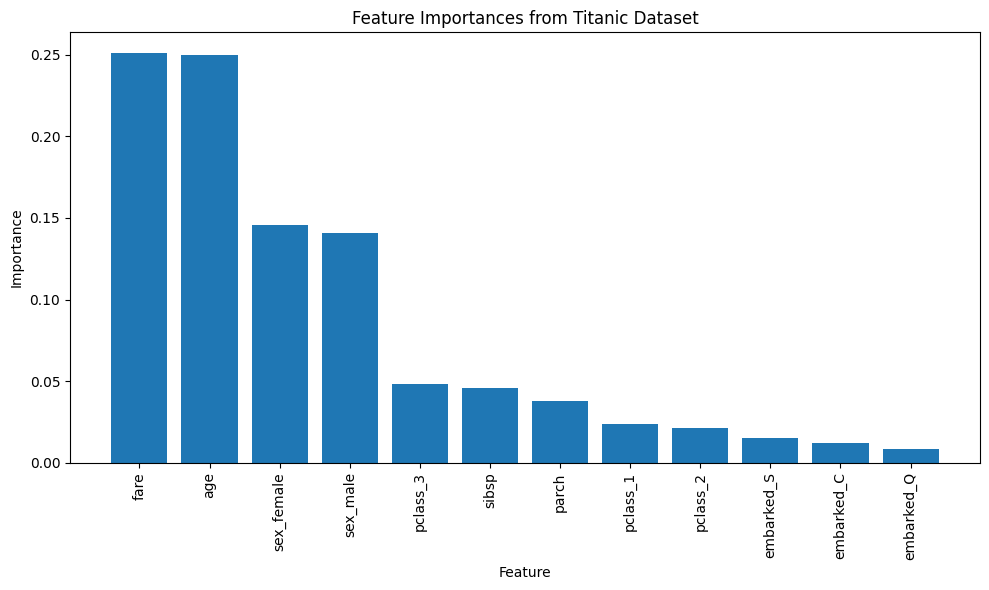

In [283]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the Titanic dataset
data = sns.load_dataset('titanic')

# Drop rows with missing target values
data = data.dropna(subset=['survived'])

# Define features and target
X_titanic = data[['pclass', 'sex', 'age', 'fare', 'embarked', 'sibsp', 'parch']]
y_titanic = data['survived']

# Handle missing values (impute with median for numerical, most frequent for categorical)
X_titanic.loc[:,'age'] = X_titanic['age'].fillna(X_titanic['age'].median())
X_titanic.loc[:,'embarked'] = X_titanic['embarked'].fillna(X_titanic['embarked'].mode()[0])

# Preprocess features
numerical_features = ['age', 'fare', 'sibsp', 'parch']
categorical_features = ['pclass', 'sex', 'embarked']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Create a pipeline with RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Extract the trained Random Forest model
rf = pipeline.named_steps['classifier']

# Get feature names in the order they appear in the preprocessed dataset
feature_names = numerical_features + list(
    pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
)

# Get importances from the fitted moddel
importances = rf.feature_importances_

# Sort feature importances
# Zip feature names with their importances and sort them
feature_importances = sorted(
    zip(feature_names, importances), 
    key=lambda x: x[1], # this sorts by "y" in each (x,y) pair
    reverse=True
)

# Separate the sorted names and importance values
sorted_features, sorted_importances = zip(*feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align='center')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.title("Feature Importances from Titanic Dataset")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


## To-Do

Determine the feature importance for the iris dataset. Make a similar plot to the one above (this dataset will not require all the fancy preprocessing.) We give code to load the dataset from sklearn

In [284]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Extract features (X) and target labels (y)
X = iris.data    # Feature matrix (shape: 150 x 4)
y = iris.target  # Target vector (shape: 150,)

# Optionally, access feature and target names
feature_names = iris.feature_names
target_names = iris.target_names

print("Feature names:", feature_names)
print("Target names:", target_names)
print("Data shape:", X.shape)
print("Target shape:", y.shape)


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)
Target shape: (150,)


In [285]:
## Your code Here

## Boosting

Boosting is a serial technique for improving training accuracy which works by training one model repeatedly, each time focusing on the wrong predictions

### Ada Boost

In [167]:
from sklearn.ensemble import AdaBoostClassifier

In [291]:
X,y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [292]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=30, learning_rate = 0.5, random_state = 42)
ada_clf.fit(X_train, y_train)

/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/env/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

In [293]:
print("Ada Boost accuracy: ", ada_clf.score(X_test, y_test))

Ada Boost accuracy:  0.904


### To-Do

**TO-DO**: Make a plot of the ada-boost accuracy as a function of the learning rate. Use cross-validation on each datapoint.

In [294]:
## Your code

### Gradient Boost

In [295]:
from sklearn.ensemble import GradientBoostingClassifier

In [296]:
gb_clf = GradientBoostingClassifier(random_state = 42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [297]:
print("Gradient Boost accuracy: ", gb_clf.score(X_test, y_test))

Gradient Boost accuracy:  0.888


### To-Do

**To_Do**. Make a simple Decision Tree classifier and a Gradient Boosting Classifier for titanic. Use the `X_titanic` and `y_titanic` already loaded, and reuse the `pipeline` from the Titanic code, only changing what you need for your different models. Compare the resulting accuracies of the two models. Make sure you use cross validation

In [299]:
## your code

In [181]:
# Create a pipeline with RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])
X_train, X_test, y_train, y_test = train_test_split(X_titanic,y_titanic,random_state=42)

In [182]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'fare', 'sibsp',
                                                   'parch']),
                                                 ('cat', OneHotEncoder(),
                                                  ['pclass', 'sex',
                                                   'embarked'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [162]:
pipeline.score(X_test, y_test)

0.7219730941704036

## Stacking

Stacking combines multiple models and makes their output to be input to a new model. This new model predicts the target based on the outputs of the input models.

In [307]:
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier

In [369]:
stacking_clf = StackingClassifier(
    estimators = [
        ('logistic', LogisticRegression(random_state = 42)),
        ('random forest', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator= MLPClassifier(random_state=42, hidden_layer_sizes=(40,10,5), learning_rate='adaptive', max_iter=1000),
    cv = 5
)

In [370]:
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('logistic',
                                LogisticRegression(random_state=42)),
                               ('random forest',
                                RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=MLPClassifier(hidden_layer_sizes=(40, 10, 5),
                                                 learning_rate='adaptive',
                                                 max_iter=1000,
                                                 random_state=42))

In [371]:
print("Stacked accuracy: ", stacking_clf.score(X_test, y_test))

Stacked accuracy:  0.92


In [375]:
print("Individual Accuracies\n")
for name, clf in stacking_clf.named_estimators_.items():
    print(f"{name} = {clf.score(X_test, y_test)}")

Individual Accuracies

logistic = 0.864
random forest = 0.896
svc = 0.896


### To-Do

Apply stacking to 3 models on the Iris dataset. Print the individual and final accuracies.

In [376]:
## Code Here

# Bigger To-Do

Load the smaller MNIST dataset we have used before (the full 60,000 dataset may take too long? I haven't tried). Make sure "X" is a list of 1D vectors. Using the 'feature importance' capabilities described above, determine which features (i.e. pixels) are most important. Make a 2D plot where the color of each pixel is a function of its importance. This will be a sort of heat-map of pixel importance in classifying digits.